1. Analise os dados do seguinte dataset.
url="https://raw.githubusercontent.com/masterfloss/data/main/dadosMundo.csv"
df=pd.read_csv(url)
2. Identifique grupos de países com características idênticas.
Sugestão:
- Reduza o número de variáveis através de PCA
 - Crie os clusters com as novas dimensões estimadas
3. Identifique possíveis relações causais e crie regressão. 

In [1]:
#Invocar bibliotecas
#Usar PCA para ajudar na visualização dos dados
#Invocar pandas
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/masterfloss/data/main/dadosMundo.csv"
df=pd.read_csv(url)

In [3]:
#Mostra todas as colunas e linhas da tabela
df

,Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
0,Afghanistan,647500,29928987.0,47.02,20.75,21.791583,18.042709,800.0,7.5,NaN,...,0.033412,NaN,42.90,2.60,0.116943,NaN,0.001106,0.000501,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,3563112.0,15.08,5.12,1897.217938,1594.112113,4900.0,5.6,3.1,...,8.419606,18.4,77.24,1.49,2.104902,NaN,0.071567,0.308719,2.04,14.8
3,Algeria,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,...,15.369552,26.2,73.00,3.20,6.424473,37.4,0.067614,0.044489,1.92,25.4
4,American Samoa,199,57881.0,23.13,3.33,2088.768335,2245.987457,8000.0,NaN,NaN,...,NaN,NaN,75.84,NaN,65.651941,NaN,0.259152,0.041067,3.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,West Bank,5860,2385615.0,32.37,3.99,NaN,NaN,800.0,6.0,NaN,...,60.780973,NaN,73.08,NaN,NaN,NaN,0.126424,0.201206,4.40,27.2
259,Western Sahara,266000,273008.0,NaN,NaN,306.584422,329.660669,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.593213,NaN,NaN,NaN,NaN,NaN
260,Yemen,527970,20727063.0,43.07,8.53,136.391731,146.668151,800.0,1.9,3.0,...,4.824610,16.1,61.75,7.80,3.763196,46.4,0.026159,0.019834,6.67,35.0
261,Zambia,752614,11261795.0,41.38,20.23,474.613505,725.195229,900.0,4.6,6.9,...,6.055873,41.4,39.70,1.80,0.976754,127.5,0.007850,0.021400,5.47,50.0


In [4]:
#Mostra apenas as primeiras linhas da tabela
df.head()

,Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
0,Afghanistan,647500,29928987.0,47.02,20.75,21.791583,18.042709,800.0,7.5,NaN,...,0.033412,NaN,42.90,2.60,0.116943,NaN,0.001106,0.000501,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,3563112.0,15.08,5.12,1897.217938,1594.112113,4900.0,5.6,3.1,...,8.419606,18.4,77.24,1.49,2.104902,NaN,0.071567,0.308719,2.04,14.8
3,Algeria,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,...,15.369552,26.2,73.00,3.20,6.424473,37.4,0.067614,0.044489,1.92,25.4
4,American Samoa,199,57881.0,23.13,3.33,2088.768335,2245.987457,8000.0,NaN,NaN,...,NaN,NaN,75.84,NaN,65.651941,NaN,0.259152,0.041067,3.25,6.0


In [5]:
#Mostra o número de colunas e linhas que existem
df.shape

(263, 22)

In [6]:
df.dtypes

Country                                            object
Area_km2                                            int64
Population                                        float64
Birth rate(births/1000 population)                float64
Death rate(deaths/1000 population)                float64
Electricity – consumption(kWh) per capita         float64
Electricity – production(kWh) per capita          float64
GDPpercapita                                      float64
GDP - real growth rate(%)                         float64
Industrial production growth rate(%)              float64
Infant mortality rate(deaths/1000 live births)    float64
Inflation rate (consumer prices)(%)               float64
Internet users in the per 1000 people             float64
Investment (gross fixed)(% of GDP)                float64
Life expectancy at birth(years)                   float64
MilitPercentGDP                                   float64
Oil – consumption(bbl/day) per 1000 persons       float64
Public debt(% 

In [7]:
#em vez de eliminar só o pais, continuar com o pais para já, mas eliminar as linhas

In [8]:
X = df.dropna()

In [9]:
X.shape

(93, 22)

In [10]:
#elimnaos a coluna e ao elimnar a colunas passamos de 22 para 21
X1=X.drop(['Country'], axis=1)

In [11]:
X1.shape

(93, 21)

In [12]:
#Stantarizar os dados. 1: importar biblioteca; 2:criar modelo; 3:
from sklearn.preprocessing import StandardScaler

In [13]:
model=StandardScaler()

In [14]:
df1=model.fit_transform(X1)

In [15]:
df1.shape

(93, 21)

In [16]:
df1

array([[ 0.83458209, -0.14294842, -0.15357443, ..., -1.0955458 ,
        -0.41538325,  1.07449879],
       [ 1.04376612, -0.10324871, -0.17948512, ..., -0.73277848,
        -0.18729943,  0.15962497],
       [ 3.71591218, -0.21344717, -0.70220509, ...,  0.930311  ,
        -0.55054404, -0.67757088],
       ...,
       [-0.17224402, -0.20983976,  2.76870059, ..., -1.17013541,
         3.59720264,  1.90306375],
       [-0.05023458, -0.26347429,  2.57831336, ..., -1.16539831,
         2.58349673,  3.19769651],
       [-0.24686376, -0.2550585 ,  1.26700722, ..., -1.14016535,
         0.95311972,  4.92387352]])

In [17]:
PCAModel = PCA(n_components=4)

In [18]:
XPCA = PCAModel.fit(df1).transform(df1)

In [19]:
XPCA.shape

(93, 4)

In [20]:
#Estes quatro componentes globalmente dão-nos estes valores
a=PCAModel.explained_variance_ratio_
a

array([0.38778049, 0.13816718, 0.08998581, 0.07379129])

In [21]:
a.sum()

0.6897247657563651

In [22]:
PCAModel

PCA(n_components=4)

In [23]:
#Relação entre as variáveis antigas e depois as colunas correspondentes às novas variáveis.
#são duas variáveis próximas, vê-se pelo peso significativo
#Podemos dar o nome de dimensão a este fator
PCAModel.components_.T

array([[-0.00277726, -0.20991483, -0.02135224,  0.62960884],
       [-0.03792603, -0.27864217, -0.06302502,  0.54677099],
       [-0.2803788 ,  0.15690514,  0.25286932,  0.12656772],
       [-0.08616507,  0.2256952 , -0.55786651,  0.07485365],
       [ 0.28555832,  0.15285908,  0.01567182,  0.22032221],
       [ 0.28076962,  0.14967927,  0.03649142,  0.20575065],
       [ 0.316945  ,  0.13989084, -0.05163858,  0.13989298],
       [ 0.01228127, -0.45841864,  0.0477068 , -0.02731498],
       [-0.03720158, -0.41735262, -0.1149418 , -0.00740534],
       [-0.2985045 ,  0.04990481, -0.1011668 ,  0.15611562],
       [-0.12861428,  0.25762969, -0.2204196 ,  0.08001203],
       [ 0.31174028,  0.10447116, -0.08442763,  0.06705761],
       [-0.00332839, -0.26469827, -0.2898024 ,  0.04703188],
       [ 0.27787043, -0.16910492,  0.26522124, -0.13460854],
       [-0.02865598,  0.08626204,  0.45906251,  0.21508452],
       [ 0.24023261,  0.11162006,  0.20245479,  0.12436822],
       [-0.01926354,  0.

In [24]:
# 0- Riqueza...
# 1- Declínio e desemprego
# 2-  
# 3- Dimensão (ver países grandes vs pequenos); pq é o q esta variável mede, é a dimensão do país
#Algumas das variáveis até podem estar relacionadas por mero acaso

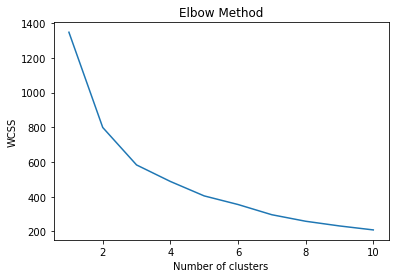

In [25]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(XPCA)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()